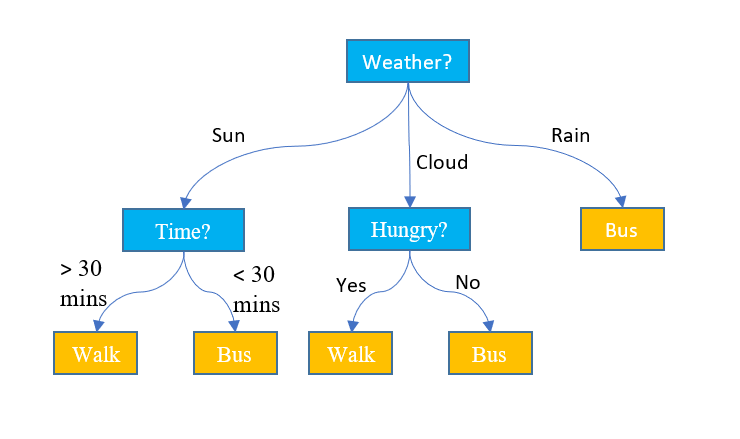

In [8]:
#Forewarning: Spelling mistakes to save width space* :(#

#Started with reading Jose Portilla's explanation/description of DT&RF
#https://towardsdatascience.com/enchanted-random-forest-b08d418cb411
#-------------------------------------------------------------
#In a library, looking for books with friend
#More informative questions first, maximizing information gain
#Frank is the decision tree.
#Sometimes questions hone in too much, (((overfitting*)))
#Ask several friends, same process, (((ensemble classifier*)))
#Similar Friends = Similar results, so we give them different samples
#drawing subsample from orig list with replacement, (((bootstrapping w orig data)))
#Friends make BOOTSTRAPPED AGGREGATED FOREST
#Fix assumptions by adding random friend questions
    #Friends ask random questions
    #"at each node of the decision tree, you randomly select the attribute
    #to split on"
#Previous randomness was bootstrapping
#"Thus, your large group of friends asking questions in random order is
#our analogy to the random forest."


#DECISION TREES - CONSTRUCTION
#-----------------------------
from IPython.display import Image
Image('https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/what-is-a-decision-tree.png')

In [9]:
#But how do we decide what features to split on???

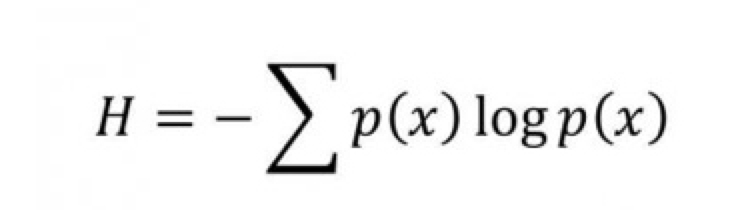

In [10]:
#INFORMATION GAIN
#----------------
#How good is the split? This is where entropy and information come to play
#If one split accurately predict 99% of outcomes, we "gain" alot.
#In order to measure info gain, we introduce entropy.
#Entropy - Measure of uncertainty associated with data.

#Equation for entropy is:
Image('https://www.splunk.com/content/dam/splunk-blogs/images/2015/10/shannon_equation.jpg')

In [11]:
#p(x) is the percent of the group that belongs to a given class
#H is the entropy

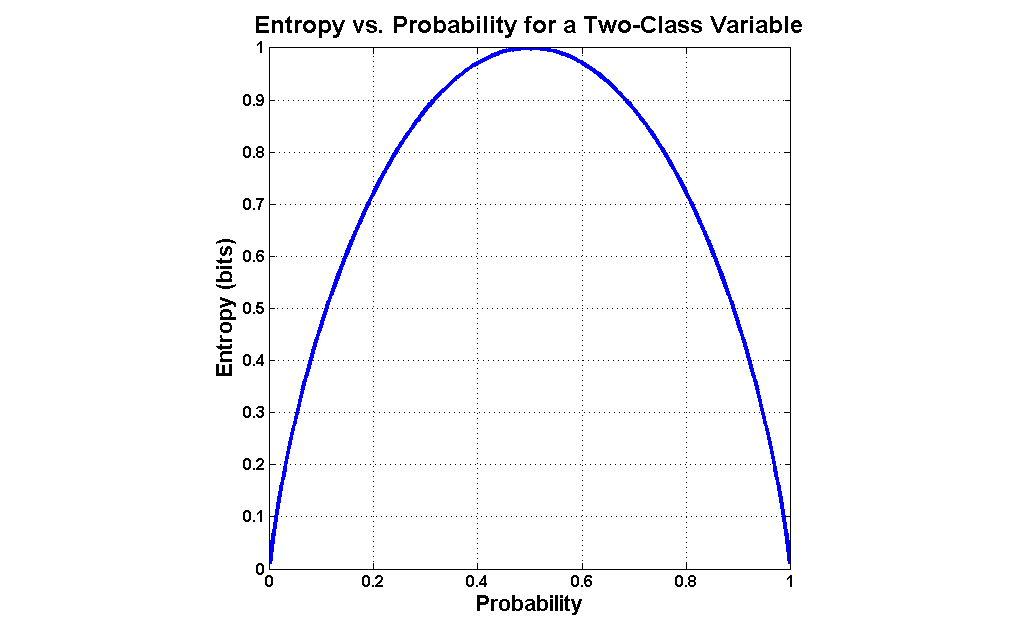

In [14]:
#"If you have a collection of data points, the entropy will be large
#when they are evenly distributed across the classes and small when they are
#mostly the same class."

#Here's a graph to demonstrate what entropy looks like:
Image('https://photos1.blogger.com/blogger/5682/4111/1600/EntropyVersusProbability.0.png')

In [15]:
#50% split would cause mass entropy, whereas 1% or 100% would not.

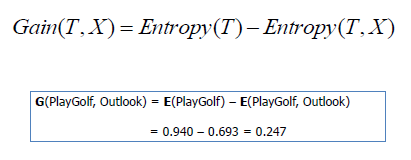

In [16]:
#Information Gain looks like this..
Image('https://www.saedsayad.com/images/Entropy_gain.png')

In [17]:
#Pros
    #Decision trees are easily interpretable and can handle outliers/mis valus
    #Can also handle discrete & continuous data types, along w irrev features
#Cons
    #Easy to overfit
    #Computationally cheap for prediction
    #Training tree can be compu expensive

In [30]:
#RANDOM FORESTS
#--------------
#Ensemble method, w multiple ML algorithms to obtain better predictive performnc
#Run multi models, use aggrg predictions > single model alone
#Dev by Leo Breimen.

#Repeatedly select data from dataset w replacement
#Build decision tree w each new sample
#w replacement, many d.points will be repeated and some not included :(#
#imp. for measuring error ^^^^^
#Each node of DTree is limited to only considering splits on rand subset feturs
#Usual parameters for forest are 10 trees and considering (n)^(1/2) features
#Where n is the total number of features.

In [31]:
#DETERMINING ERROR
#-----------------
#How well did the RF perform? CrossValidation method! train/test/split
#then compare pred w actual values
#"When selecting dataset, about one third of data is leftout"
#"So essentil every data point can be tested w about 1/3 of trees"
#"After calculating percent of d.points w correct prediction we get
#(((OUT OF BAG ERROR!!!)))"

In [32]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

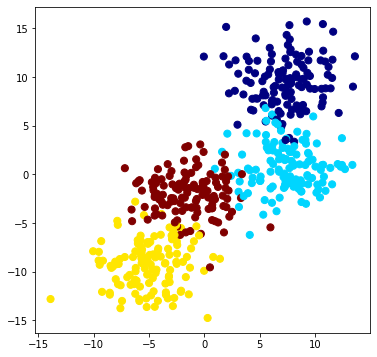

In [33]:
#Classification - Ensemble Learner, Ensemble of many weak learners (trees)
#Let's make some data using builtin functions of scikitlearn

#Fake DataSet
from sklearn.datasets import make_blobs

#125 samples per center, random_state for instructional purposes, clstd 2.4=O.K.
X, y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
#grab from X the zero & one axis.
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
    #Fit the X & y data to the tree
    classifier.fit(X, y)
    
    #Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:,0].min() - 0.1, X[:,0].max() + 0.1)
    if ylim is None:
        ylim = (X[:,1].min() - 0.1, X[:,1].max() + 0.1)
    
    #Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    #Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    #Define the Z by the predictions (this will color the meshgrid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    #Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    #Plot training points
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')
    
    #Set limits
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the decision boundaries
        '''
        
        if i < 0:
            return
        
        #shorter variable name
        tree = classifier.tree_
        
        #Recursively go through nodes of tree to plot boundaries
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                           [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                           [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                           [tree.threshold[i], ylim[1]])
    #Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

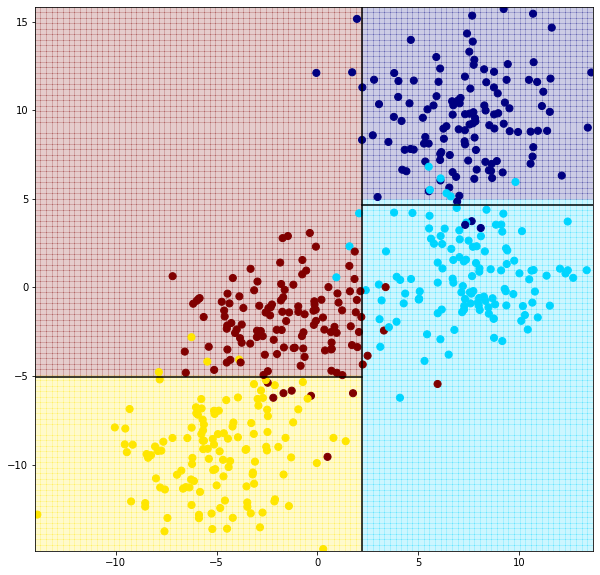

In [41]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,y)

#Changing the max_depth really changes the boundaries.
#Should probably read more into overfitting... 

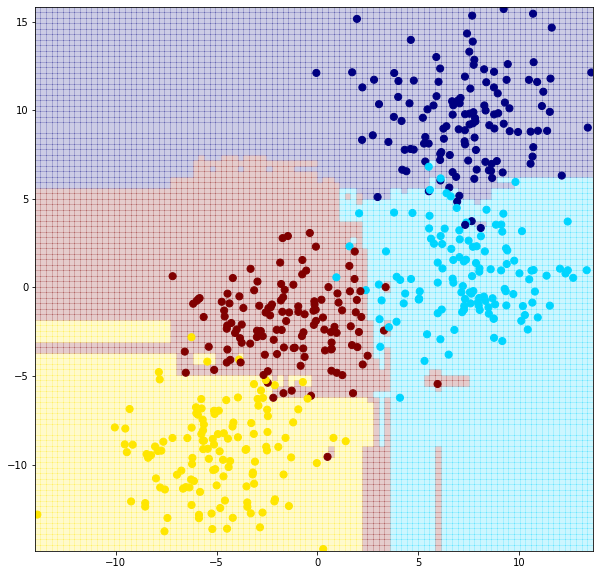

In [43]:
from sklearn.ensemble import RandomForestClassifier

#random_state for teaching purposes.
clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf, X, y,boundaries=False)

#Overfitting isn't AS bad as decision tree.

In [44]:
x = 10 * np.random.rand(100)

In [45]:
x

array([0.24942269, 4.89514012, 3.74601359, 5.77378671, 0.466835  ,
       1.57219694, 6.86744435, 1.42554228, 8.7859723 , 4.10280452,
       7.45776051, 6.8652794 , 5.19497842, 5.63401456, 7.23420306,
       9.97567437, 9.78625428, 6.34787515, 8.18221038, 3.41244244,
       1.93699495, 4.8605394 , 7.50515279, 0.04669122, 5.58526239,
       1.91640512, 9.8489061 , 3.36467106, 6.44901809, 9.9584904 ,
       1.42914996, 0.70570122, 7.56935046, 9.86137458, 7.14256048,
       5.55868352, 3.57474469, 4.51261649, 8.33127771, 0.36192518,
       7.41324799, 6.05460759, 2.44990625, 7.28539899, 5.32222002,
       6.97998898, 8.09406393, 0.59461197, 0.90376829, 5.48590466,
       7.0538711 , 2.12816235, 7.45324244, 5.97891998, 6.58305452,
       7.87879791, 2.39221014, 0.46052631, 2.17308767, 7.38467969,
       6.88895284, 4.86008164, 4.98508776, 8.9847398 , 1.21144568,
       7.0741972 , 3.67175735, 2.33558337, 4.53385948, 6.5929422 ,
       6.78369831, 0.76438876, 6.11406295, 0.58050788, 5.09613

In [46]:
def sin_model(x,sigma=0.2):
    
    noise=sigma*np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [47]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

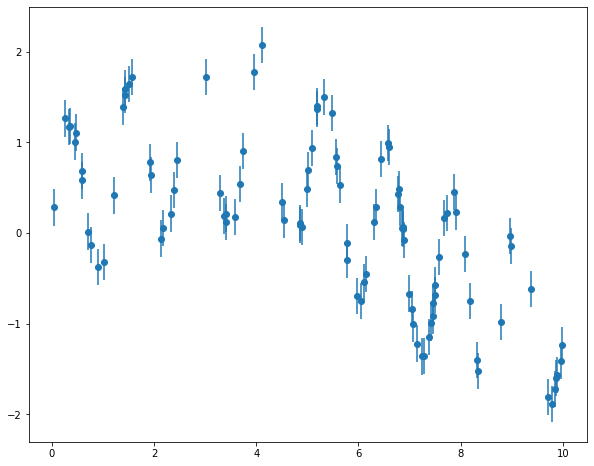

In [49]:
#errorbar figure to plot trend a little better.
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.2,fmt='o')

#obvious sin pattern over another sin pattern.

In [51]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)

rfr = RandomForestRegressor(100)

In [52]:
rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])

In [53]:
ytrue = sin_model(xfit, 0)

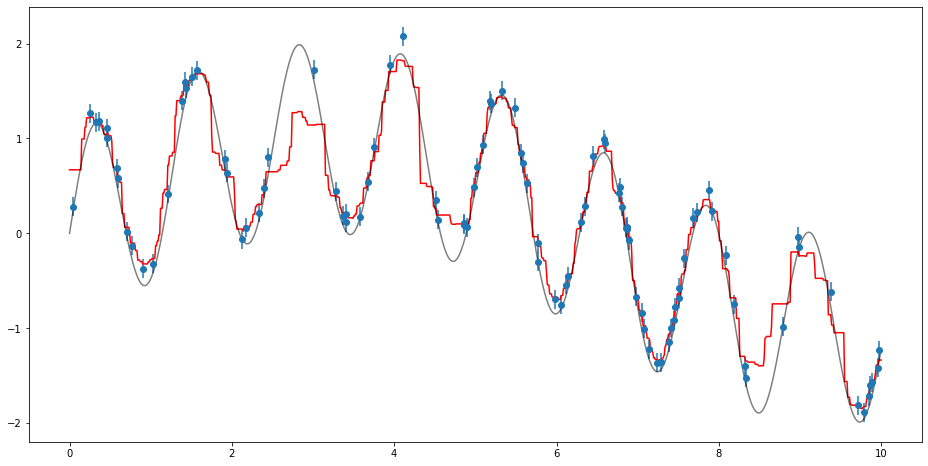

In [55]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,'-r')

plt.plot(xfit,ytrue,'-k',alpha=0.5)